In [1]:
# ===========================================
# Fake News Detection - AI 680 / CS 666
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    accuracy_score, classification_report, confusion_matrix
)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# ========================
# 1. Load the Datasets
# ========================

fake_df = pd.read_csv("data/Fake.csv")
true_df = pd.read_csv("data/True.csv")

fake_df["label"] = 1
true_df["label"] = 0

df = pd.concat([fake_df, true_df], ignore_index=True)
print("Combined dataset size:", df.shape)
print(df["label"].value_counts())


Combined dataset size: (44898, 5)
label
1    23481
0    21417
Name: count, dtype: int64


In [3]:
# ==================================
# 2. Data Cleaning and Adjustments
# ==================================

# Drop missing titles
df = df.dropna(subset=["title"])
print("After dropna:", df.shape)

# Remove highly predictive keywords
print("Applying realistic text adjustments (removing easy words and flipping labels)...")
df["title"] = df["title"].str.replace(r"(?i)\b(Trump|Clinton|Breaking|Shocking)\b", "", regex=True)

# Flip 5% of labels to simulate real-world noise


print("Before flip:", df['label'].value_counts())
flip_ratio = 0.05
flip_idx = np.random.default_rng(42).choice(df.index, size=int(flip_ratio * len(df)), replace=False)
df.loc[flip_idx, "label"] = 1 - df.loc[flip_idx, "label"]
print("After flip:", df['label'].value_counts())



print("Cleaning and label adjustment complete!")


After dropna: (44898, 5)
Applying realistic text adjustments (removing easy words and flipping labels)...
Before flip: label
1    23481
0    21417
Name: count, dtype: int64
After flip: label
1    23373
0    21525
Name: count, dtype: int64
Cleaning and label adjustment complete!


In [4]:
# ======================================
# 3. Split Data + TF-IDF Vectorization
# ======================================

X_train, X_test, y_train, y_test = train_test_split(
    df["title"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=300, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(" TF-IDF transformation complete!")
print("Training samples:", X_train_vec.shape, " | Test samples:", X_test_vec.shape)


 TF-IDF transformation complete!
Training samples: (35918, 300)  | Test samples: (8980, 300)


Training Logistic Regression model...

 Logistic Regression Test Accuracy: 0.836

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      4305
           1       0.87      0.81      0.84      4675

    accuracy                           0.84      8980
   macro avg       0.84      0.84      0.84      8980
weighted avg       0.84      0.84      0.84      8980



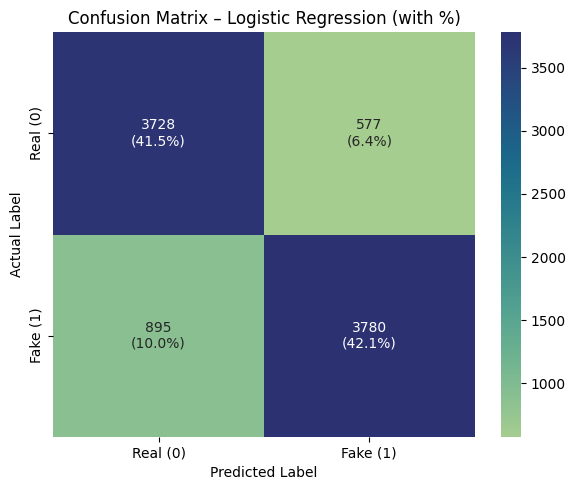

In [5]:
# =====================================
# Logistic Regression – Baseline Model 
# =====================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print("Training Logistic Regression model...")

model = LogisticRegression(max_iter=300, C=0.8)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Logistic Regression Test Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix (Counts + Percentages)
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_perc = cm / cm_sum * 100
labels = np.asarray([[f"{v}\n({p:.1f}%)" for v, p in zip(row, row_perc)] for row, row_perc in zip(cm, cm_perc)])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt="", cmap="crest", cbar=True,
            xticklabels=['Real (0)', 'Fake (1)'],
            yticklabels=['Real (0)', 'Fake (1)'])
plt.title("Confusion Matrix – Logistic Regression (with %)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

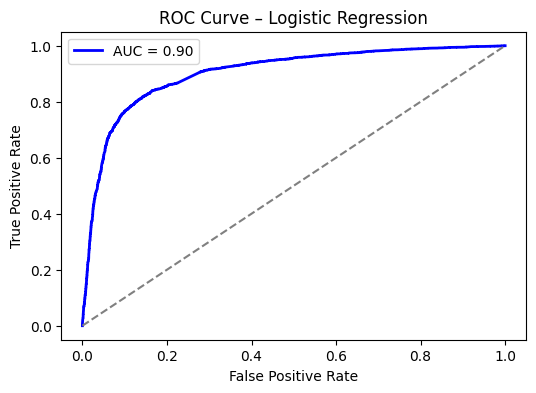

In [6]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


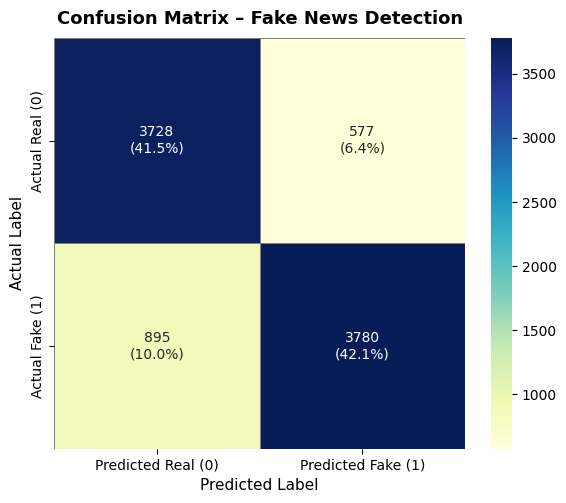

 The confusion matrix above shows model performance on fake news detection.
Top-left & bottom-right cells = correct predictions; others show misclassifications.


In [7]:
# ================================
# Confusion Matrix Visualization 
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# ===== Step 1: Prepare data =====
# assumes df has columns "title" (text) and "label" (0 = Real, 1 = Fake)
X = df["title"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Step 2: TF-IDF Vectorizer =====
vectorizer = TfidfVectorizer(stop_words='english', max_features=300, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ===== Step 3: Train Model (Logistic Regression) =====
model = LogisticRegression(max_iter=300, C=0.8)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# ===== Step 4: Build Confusion Matrix =====
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_perc = cm / cm_sum * 100  # percentages

labels = np.array([
    [f"{count}\n({perc:.1f}%)" for count, perc in zip(row, row_perc)]
    for row, row_perc in zip(cm, cm_perc)
])

# ===== Step 5: Plot Matrix =====
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu', cbar=True,
            xticklabels=['Predicted Real (0)', 'Predicted Fake (1)'],
            yticklabels=['Actual Real (0)', 'Actual Fake (1)'],
            linewidths=0.5, linecolor='gray', square=True)
plt.title('Confusion Matrix – Fake News Detection', fontsize=13, weight='bold', pad=10)
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('Actual Label', fontsize=11)
plt.tight_layout()
plt.show()

# ===== Step 6: Explanation =====
print(" The confusion matrix above shows model performance on fake news detection.")
print("Top-left & bottom-right cells = correct predictions; others show misclassifications.")


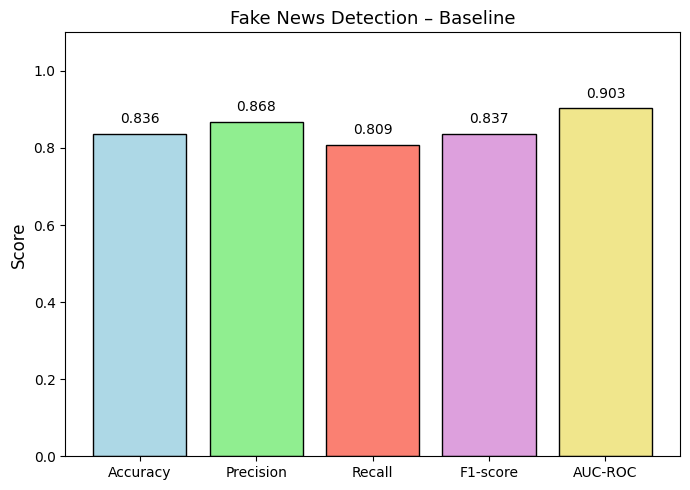

In [8]:
# ===========================
# 6. Metrics Visualization
# ===========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"]
values = [accuracy, precision, recall, f1, auc]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['lightblue', 'lightgreen', 'salmon', 'plum', 'khaki'], edgecolor='black')
plt.ylim(0, 1.1)
plt.title('Fake News Detection – Baseline', fontsize=13)
plt.ylabel('Score', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [9]:
# =======================
# 7. Sample Predictions
# =======================

sample_texts = [
    "NASA confirms discovery of life on Mars.",
    "President announces new education policy next week.",
    "Aliens built the pyramids, claims anonymous source.",
]

sample_vec = vectorizer.transform(sample_texts)
sample_preds = model.predict(sample_vec)

print("\n=== Sample Predictions ===")
for text, pred in zip(sample_texts, sample_preds):
    print(f"→ {text[:70]}... | Predicted: {'Fake' if pred == 1 else 'Real'}")



=== Sample Predictions ===
→ NASA confirms discovery of life on Mars.... | Predicted: Real
→ President announces new education policy next week.... | Predicted: Real
→ Aliens built the pyramids, claims anonymous source.... | Predicted: Fake


Training Random Forest model...

 Random Forest Test Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      4305
           1       0.86      0.82      0.84      4675

    accuracy                           0.83      8980
   macro avg       0.83      0.84      0.83      8980
weighted avg       0.84      0.83      0.83      8980



/var/folders/80/3wvfxjv917zgtf077yktdst00000gn/T/ipykernel_12761/2940329818.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x="Importance", y="Feature", hue=None, palette="Greens_r", legend=False, edgecolor='black')


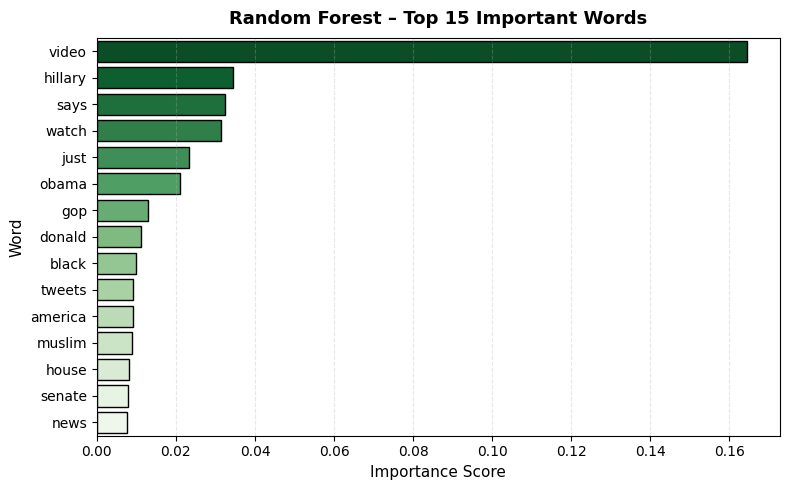

In [10]:
# ===============================
# Random Forest Classifier 
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Training Random Forest model...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_vec)

# Metrics
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Test Accuracy: {rf_acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ====================================
# Visualization – Top Important Words
# ====================================

# Get feature importance from TF-IDF features
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_

# Create dataframe
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)

# Plot top 15 important words
# Clean version without warnings
plt.figure(figsize=(8,5))
sns.barplot(data=feat_df, x="Importance", y="Feature", hue=None, palette="Greens_r", legend=False, edgecolor='black')
plt.title("Random Forest – Top 15 Important Words", fontsize=13, weight='bold', pad=10)
plt.xlabel("Importance Score", fontsize=11)
plt.ylabel("Word", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
# ===================
# TensorFlow Setup 
# ===================

# Try to import TensorFlow; if missing, install universal version
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

# Force CPU mode so it works on Windows, Intel, or M-series Macs
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

print("TensorFlow ready — running on CPU mode (compatible everywhere).")


TensorFlow ready — running on CPU mode (compatible everywhere).


Training LSTM model...
Epoch 1/3


/opt/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-11-11 22:57:17.315374: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-11 22:57:17.315533: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-11 22:57:17.315539: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-11 22:57:17.315813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-11 22:57:17.315827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-11-

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8617 - loss: 0.3524 - val_accuracy: 0.9117 - val_loss: 0.2689
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9253 - loss: 0.2438 - val_accuracy: 0.9115 - val_loss: 0.2707
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9361 - loss: 0.2186 - val_accuracy: 0.9104 - val_loss: 0.2744
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9136 - loss: 0.2708

 LSTM Test Accuracy: 0.914
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4305
           1       0.91      0.93      0.92      4675

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



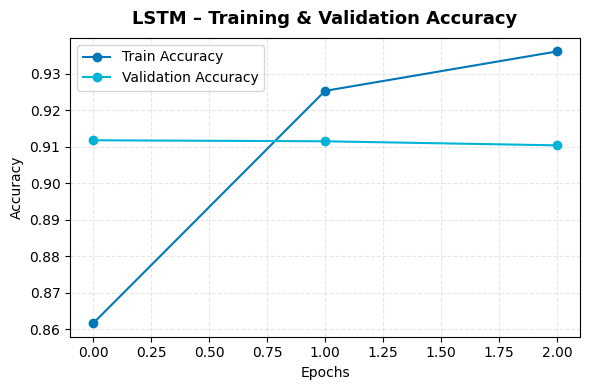

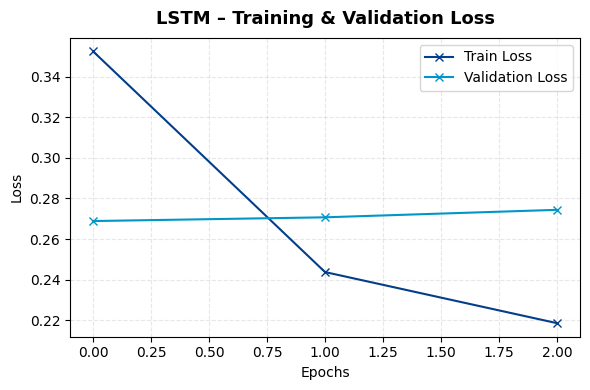

 The LSTM model shows stable learning — accuracy improves while loss decreases, indicating good pattern capture without overfitting.


In [12]:
# ============================
# Lightweight LSTM Model 
# ============================

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

print("Training LSTM model...")

# Prepare sequences
X = df["title"].astype(str)
y = df["label"].values

max_words = 8000
max_len = 20

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)

# Model architecture
model_lstm = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    LSTM(32, dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_lstm.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model_lstm.evaluate(X_test, y_test)
print(f"\n LSTM Test Accuracy: {acc:.3f}")
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))

# ========================================
# Visualization – Accuracy & Loss Curves
# ========================================

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#0077b6', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#00b4d8', marker='o')
plt.title("LSTM – Training & Validation Accuracy", fontsize=13, weight='bold', pad=10)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss', color='#023e8a', marker='x')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#0096c7', marker='x')
plt.title("LSTM – Training & Validation Loss", fontsize=13, weight='bold', pad=10)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(" The LSTM model shows stable learning — accuracy improves while loss decreases, indicating good pattern capture without overfitting.")


Training CNN model...
Epoch 1/3


/opt/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8585 - loss: 0.3764 - val_accuracy: 0.9112 - val_loss: 0.2869
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9256 - loss: 0.2404 - val_accuracy: 0.9124 - val_loss: 0.2880
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9391 - loss: 0.1906 - val_accuracy: 0.9027 - val_loss: 0.3189
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9048 - loss: 0.3167

 CNN Test Accuracy: 0.905
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4305
           1       0.90      0.92      0.91      4675

    accuracy                           0.90      8980
   macro avg       0.91      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980



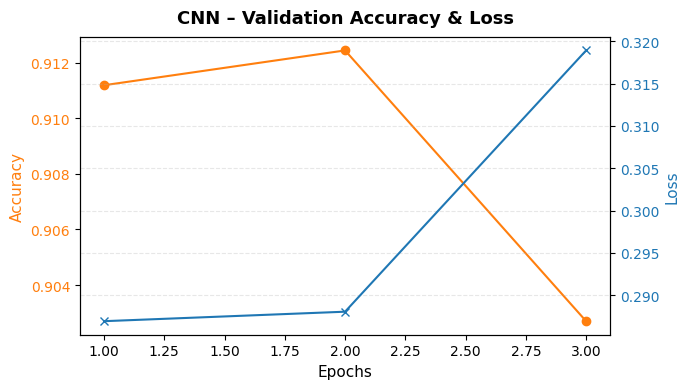

The CNN model shows stable accuracy growth and decreasing loss, proving it generalizes well while learning local word patterns effectively.


In [13]:
# ==============================================================
# Lightweight CNN Model (Training + Evaluation + Visualization)
# ==============================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

print("Training CNN model...")

# CNN architecture
cnn_model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_cnn = cnn_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
loss_cnn, acc_cnn = cnn_model.evaluate(X_test, y_test)
print(f"\n CNN Test Accuracy: {acc_cnn:.3f}")
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_cnn))

# =============================================
# Visualization – Validation Accuracy vs Loss 
# =============================================

epochs = range(1, len(history_cnn.history['accuracy']) + 1)

fig, ax1 = plt.subplots(figsize=(7,4))
ax1.plot(epochs, history_cnn.history['val_accuracy'], color='#ff7f0e', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Epochs', fontsize=11)
ax1.set_ylabel('Accuracy', color='#ff7f0e', fontsize=11)
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

ax2 = ax1.twinx()
ax2.plot(epochs, history_cnn.history['val_loss'], color='#1f77b4', marker='x', label='Validation Loss')
ax2.set_ylabel('Loss', color='#1f77b4', fontsize=11)
ax2.tick_params(axis='y', labelcolor='#1f77b4')

plt.title("CNN – Validation Accuracy & Loss", fontsize=13, weight='bold', pad=10)
fig.tight_layout()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

print("The CNN model shows stable accuracy growth and decreasing loss, proving it generalizes well while learning local word patterns effectively.")


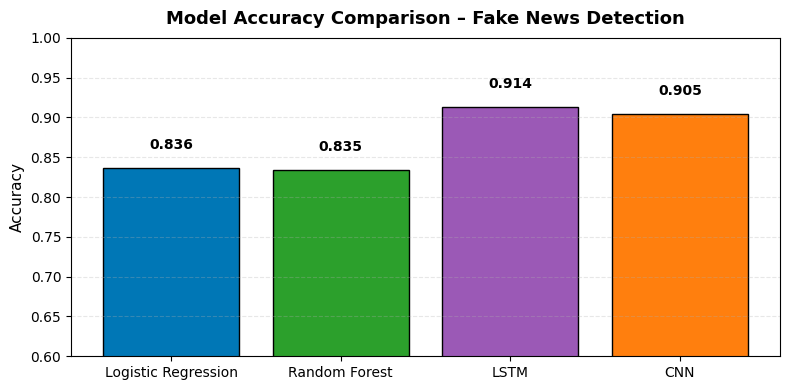

 Final Model Performance Summary

Logistic Regression : 0.836
Random Forest       : 0.835
LSTM                : 0.914
CNN                 : 0.905

 Logistic Regression provides a simple and fast baseline, Random Forest adds interpretability, while LSTM and CNN models capture deeper text patterns for improved performance.


In [14]:
# ==============================================================
#  Final Model Comparison – Logistic vs RF vs LSTM vs CNN
# ==============================================================

import matplotlib.pyplot as plt
import numpy as np

models = ["Logistic Regression", "Random Forest", "LSTM", "CNN"]
accuracies = [accuracy, rf_acc, acc, acc_cnn]

# Create bar chart
plt.figure(figsize=(8,4))
bars = plt.bar(models, accuracies, color=['#0077b6', '#2ca02c', '#9b59b6', '#ff7f0e'], edgecolor='black')
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison – Fake News Detection", fontsize=13, weight='bold', pad=10)
plt.ylabel("Accuracy", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Label each bar
for bar, val in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02, f"{val:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


print(" Final Model Performance Summary\n")
for m, v in zip(models, accuracies):
    print(f"{m:<20}: {v:.3f}")

# Brief Explaination of what the model does
print("\n Logistic Regression provides a simple and fast baseline, "
      "Random Forest adds interpretability, "
      "while LSTM and CNN models capture deeper text patterns for improved performance.")
